In [43]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

location='Kaohsiung'
FileName=location+'/g2'
# Load and preprocess new_data test
data = pd.read_csv('Data/{}.csv'.format(FileName), sep=';', parse_dates=['date_time'])
data.set_index('date_time', drop=False, inplace=True)
# Create a copy of the original data
new_data = data.copy()

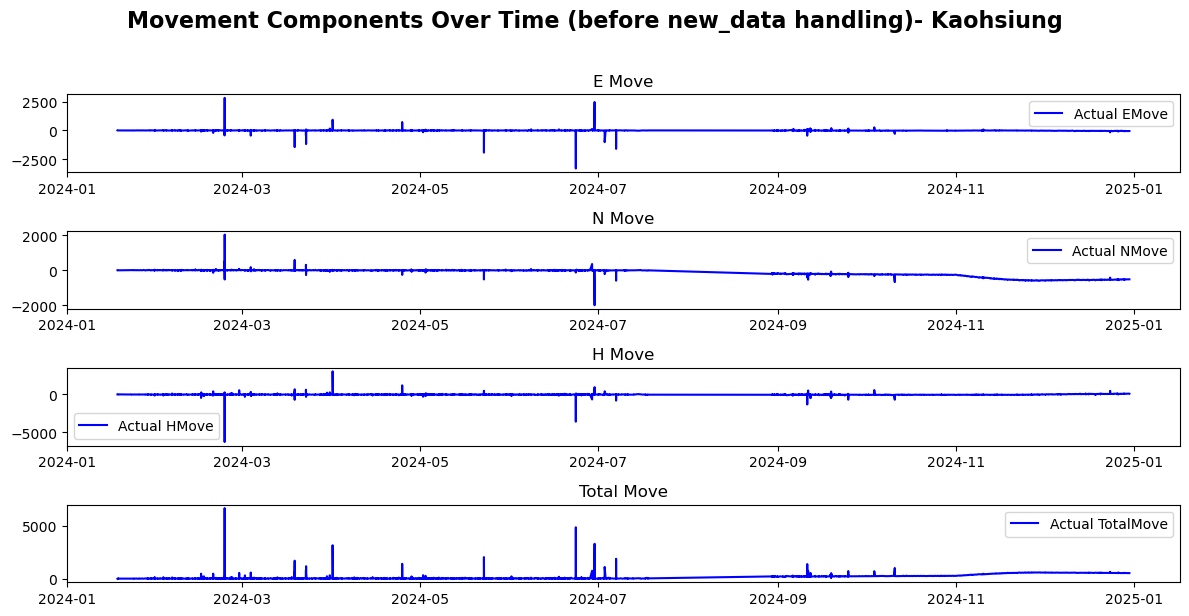

In [44]:
# Plot predictions vs actual values for  each movement component
plt.figure(figsize=(12, 6))
# Add a main title for all subplots
plt.suptitle("Movement Components Over Time (before new_data handling)- {}".format(location), fontsize=16, fontweight='bold', y=1.02)

plt.subplot(4, 1, 1)
plt.plot(new_data.index, new_data['EMove'], label="Actual EMove", color='blue')
#plt.plot(new_data.index[:len(scaled_target_data)], scaled_target_data[:, 0], label="scaled EMove", color='red', linestyle='dashed')
plt.title("E Move")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(new_data.index, new_data['NMove'], label="Actual NMove", color='blue')
#plt.plot(new_data.index[:len(scaled_target_data)], scaled_target_data[:, 1], label="scaled EMove", color='red', linestyle='dashed')
plt.title("N Move")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(new_data.index, new_data['HMove'], label="Actual HMove", color='blue')
#plt.plot(new_data.index[:len(scaled_target_data)], scaled_target_data[:, 2], label="scaled EMove", color='red', linestyle='dashed')
plt.title("H Move")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(new_data.index, new_data['TotalMove'], label="Actual TotalMove", color='blue')
#plt.plot(new_data.index[:len(scaled_target_data)], scaled_target_data[:, 3], label="scaled EMove", color='red', linestyle='dashed')
plt.title("Total Move")
plt.legend()

plt.tight_layout()
plt.show()

In [45]:
# Remove values outside 3 standard deviations
target_columns = ['EMove', 'NMove', 'HMove']

for col in target_columns:
    mean = new_data[col].mean()
    std = new_data[col].std()
    new_data = new_data[(new_data[col] >= mean - 3*std) & (new_data[col] <= mean + 3*std)]

In [46]:
#Normalize only the target columns (EMove, NMove, HMove) between 0 to 1   
scaler = MinMaxScaler()
target_columns.append('TotalMove')
scaled_target_data = scaler.fit_transform(new_data[target_columns])
# Overwrite only the target columns in the new new_dataframe
new_data[target_columns] = scaled_target_data

# Save the modified new_data to a new CSV file
new_data.to_csv("Data/{}_scaled.csv".format(FileName), sep=';', index=False)

print("New CSV file saved with scaled target columns.")

New CSV file saved with scaled target columns.


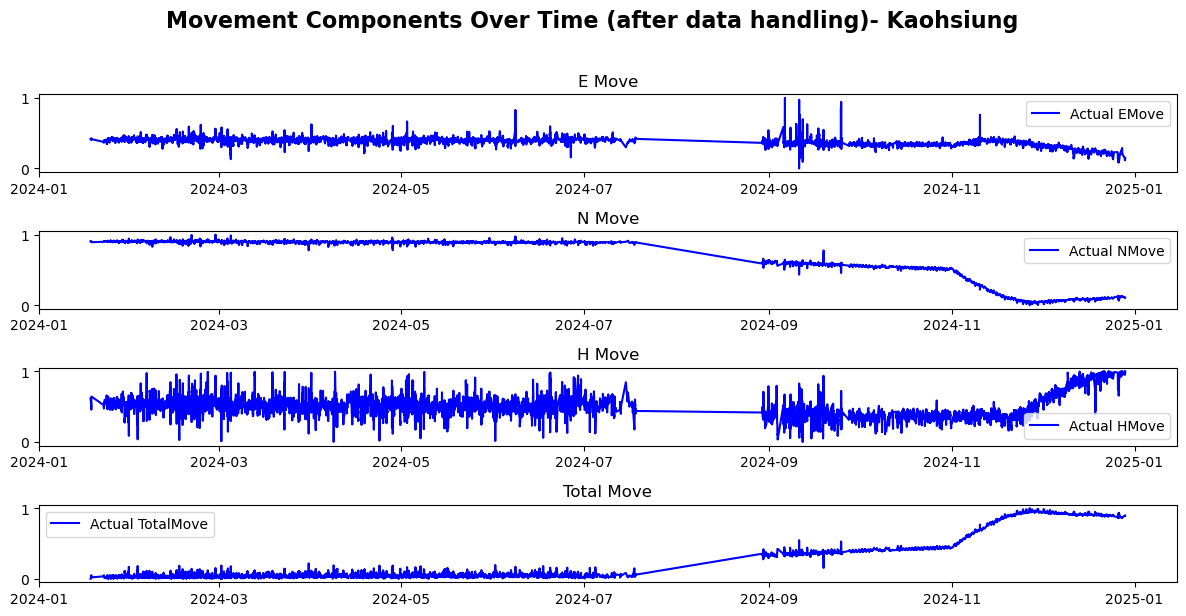

In [47]:
# Plot predictions vs actual values for  each movement component
plt.figure(figsize=(12, 6))

# Add a main title for all subplots
plt.suptitle("Movement Components Over Time (after data handling)- {}".format(location), fontsize=16, fontweight='bold', y=1.02)

plt.subplot(4, 1, 1)

plt.plot(new_data.index, new_data['EMove'], label="Actual EMove", color='blue')
#plt.plot(new_data.index[:len(scaled_target_data)], scaled_target_data[:, 0], label="scaled EMove", color='red', linestyle='dashed')
plt.title("E Move")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(new_data.index, new_data['NMove'], label="Actual NMove", color='blue')
#plt.plot(danew_datata.index[:len(scaled_target_data)], scaled_target_data[:, 1], label="scaled EMove", color='red', linestyle='dashed')
plt.title("N Move")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(new_data.index, new_data['HMove'], label="Actual HMove", color='blue')
#plt.plot(new_data.index[:len(scaled_target_data)], scaled_target_data[:, 2], label="scaled EMove", color='red', linestyle='dashed')
plt.title("H Move")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(new_data.index, new_data['TotalMove'], label="Actual TotalMove", color='blue')
#plt.plot(new_data.index[:len(scaled_target_data)], scaled_target_data[:, 3], label="scaled EMove", color='red', linestyle='dashed')
plt.title("Total Move")
plt.legend()

plt.tight_layout()
plt.show()